# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json

# Load Files

In [3]:
# Load csv files

info_file = "Data/superhero_info - superhero_info.csv"
powers_file = "Data/superhero_powers - superhero_powers.csv"

info_df = pd.read_csv(info_file)
powers_df = pd.read_csv(powers_file)

# Check if the dataframes loaded
display(info_df.head())
(display(powers_df.head()))

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


# To Do

- Split Hero | Publisher
- Split Measurements into 'Height' and 'Weight'

After cleaning info, check if powers_df needs to be cleaned. Clean it if it does.
- If it does (or doesn't), either way, combine the two at the end.
- After combining the dataframes into one, perform OHE. Or...OHE then combine?

# Cleaning

In [4]:
# Check columns in info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


## Split Hero|Publisher

In [5]:
# Split hero and publisher into separate columns
info_df[['Hero', 'Publisher']] = info_df['Hero|Publisher'].str.split('|', expand=True)

# Verify split
info_df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [6]:
# Drop Hero|Publisher column
info_df = info_df.drop(columns="Hero|Publisher")

# Verify drop
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


## Split Measurements

In [7]:
# Replace the single quotes with double quotes
info_df['Measurements'] = info_df['Measurements'].str.replace("'", '"')

# Apply to entire column
info_df['Measurements'] = info_df['Measurements'].apply(json.loads)

# Verify changes
info_df['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [8]:
# Create series of height and weight values
height_weight = info_df['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [9]:
# Split columns to separate cm/kg from numerical values
height_weight[['Height (cm)', 'cm']] = height_weight['Height'].str.split(' ', expand=True)
height_weight[['Weight (kg)', 'kg']] = height_weight['Weight'].str.split(' ', expand=True)

# Verify changes
height_weight

,Height,Weight,Height (cm),cm,Weight (kg),kg
0,203.0 cm,441.0 kg,203.0,cm,441.0,kg
1,191.0 cm,65.0 kg,191.0,cm,65.0,kg
2,185.0 cm,90.0 kg,185.0,cm,90.0,kg
3,203.0 cm,441.0 kg,203.0,cm,441.0,kg
4,193.0 cm,122.0 kg,193.0,cm,122.0,kg
...,...,...,...,...,...,...
458,183.0 cm,83.0 kg,183.0,cm,83.0,kg
459,165.0 cm,52.0 kg,165.0,cm,52.0,kg
460,66.0 cm,17.0 kg,66.0,cm,17.0,kg
461,170.0 cm,57.0 kg,170.0,cm,57.0,kg


In [10]:
# Drop height, weight, cm, and kg columns
height_weight = height_weight.drop(columns=['Height', 'Weight', 'cm', 'kg'])

# Verify the changes
height_weight.head()

,Height (cm),Weight (kg)
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0


In [11]:
# Concatenate height_weight with info_df
info_df = pd.concat((info_df, height_weight), axis=1)
info_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,122.0


In [12]:
# Drop measurements column
info_df.drop(columns='Measurements')
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   Hero          463 non-null    object
 8   Publisher     463 non-null    object
 9   Height (cm)   463 non-null    object
 10  Weight (kg)   463 non-null    object
dtypes: object(11)
memory usage: 39.9+ KB


In [13]:
# Set height/weight columns to be numeric
info_df[['Height (cm)', 'Weight (kg)']] = info_df[['Height (cm)', 'Weight (kg)']].astype('float')
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        463 non-null    object 
 1   Race          463 non-null    object 
 2   Alignment     463 non-null    object 
 3   Hair color    463 non-null    object 
 4   Eye color     463 non-null    object 
 5   Skin color    463 non-null    object 
 6   Measurements  463 non-null    object 
 7   Hero          463 non-null    object 
 8   Publisher     463 non-null    object 
 9   Height (cm)   463 non-null    float64
 10  Weight (kg)   463 non-null    float64
dtypes: float64(2), object(9)
memory usage: 39.9+ KB


# Powers

In [14]:
# Split the powers into a new column
powers_df['Powers_Split'] = powers_df['Powers'].str.split(',')
powers_df['Powers_Split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: Powers_Split, dtype: object

In [15]:
powers_df.head()

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."


In [16]:
# Explode columns
exploded = powers_df.explode('Powers_Split')
exploded.head()

,hero_names,Powers,Powers_Split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [17]:
# Saving the unique values from the exploded column
cols_to_make = exploded['Powers_Split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [20]:
# Loop through columns to add true and false labels
for col in cols_to_make:
    powers_df[col] = powers_df['Powers'].str.contains(col)
powers_df.head()

,hero_names,Powers,Powers_Split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Drop Powers and Powers_Split columns.
powers_df = powers_df.drop(columns = ['Powers', 'Powers_Split'])

# Verify changes
powers_df.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Merge dataframes powers_df and info_df
merged_df = pd.merge(info_df, powers_df, left_on = 'Hero', 
                  right_on = 'hero_names', how = 'inner')

merged_df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height (cm),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics,185.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics,203.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics,193.0,...,False,False,False,False,False,False,False,False,False,False


# Questions

## 1.
Compare the average weight of super heroes who have Super Speed to those who do not.

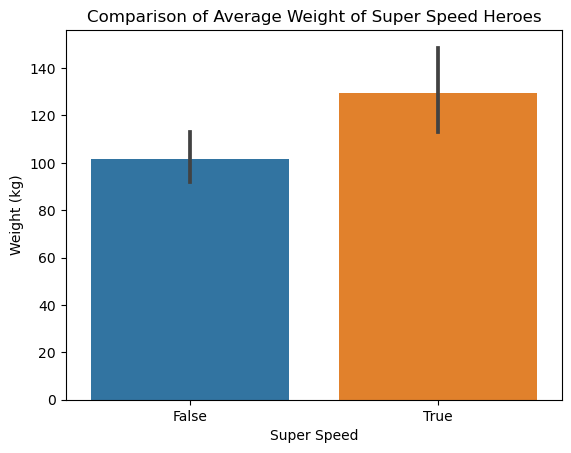

In [23]:
ax = sns.barplot(data=merged_df, x='Super Speed', y='Weight (kg)')
ax.set_title('Comparison of Average Weight of Super Speed Heroes');

Heroes with super speed typically have a higher weight than those that do not.

## 2. 
What is the average height of heroes for each publisher?

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height (cm), dtype: float64

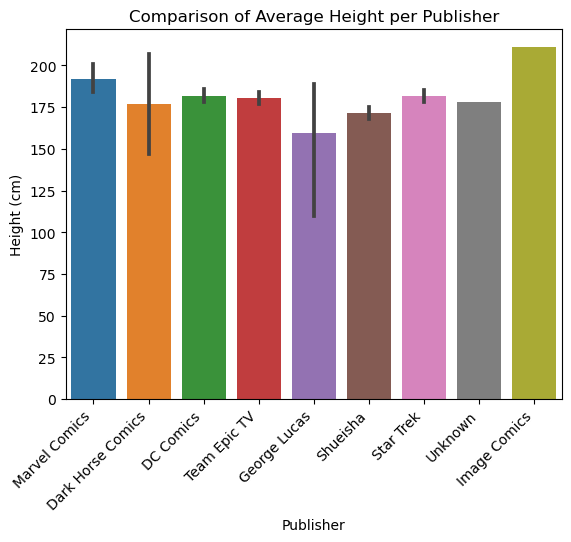

In [25]:
# Compare heights of heroes for each publisher
average_height = merged_df.groupby('Publisher')['Height (cm)'].mean()
display(average_height)

# Plot heights by each publisher
ax = sns.barplot(data = merged_df, x='Publisher', y='Height (cm)')
ax.set_title('Comparison of Average Height per Publisher')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right');

George Lucas has lowest average height while Image Comics has the largest average height.